# Laboratoratorio 4 - Apreandizaje estadistico

por: Nicolas Osorno Roa


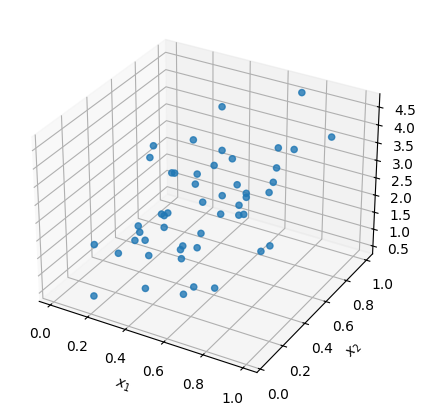

In [1]:
#@title 1. Generar datos aleatrios y grafica

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from mpl_toolkits.mplot3d import Axes3D

y= lambda X: 2.1*X[0] + 3.1*X[1]

Ndatos = 50

x1 = np.random.random(Ndatos)
x2 = np.random.random(Ndatos)


fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y([x1,x2]) , alpha=0.8)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("y")

plt.show()



In [2]:
#@title 2. Definir Theta

th =  np.random.random(3)
th

array([0.17292491, 0.24830588, 0.01942553])

In [3]:
#@title 3. Definir matriz X

X = np.array([np.ones(Ndatos), x1,x2])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.525081,0.331249,0.715610,0.299394,0.726983,0.834080,0.047041,0.028190,0.823055,0.805903,...,0.355850,0.513855,0.375155,0.750873,0.176765,0.660073,0.545809,0.232182,0.792980,0.396162
2,0.688960,0.444109,0.485155,0.441583,0.400265,0.701603,0.744840,0.806564,0.498167,0.059876,...,0.372959,0.255576,0.629315,0.401936,0.060925,0.040743,0.211144,0.320119,0.617488,0.578178


In [4]:
#@title 4. Calcular funcion de coste

h =  th.T@X

Lamb = h - y([x1,x2])

J = np.mean(Lamb**2)/2

float(J)

2.699714277270074

In [5]:
#@title 5. Aplicar Gradiente Descendente y 6. Iterar Para hallar lor parametros esperados
from IPython.display import display, Math

th =  np.random.random(3)
alpha = 0.01

for i in range(10000):
  h  =  th.T@X
  Lamb = h - y([x1,x2])
  J = np.mean(Lamb**2)/2
  GradJ = Lamb@X.T/Ndatos
  th = th - alpha*GradJ
print('th_0 esperado es:',0, ', th_0 obtenido es:', round(float(th[0]),6))
print('th_1 esperado es:',2.1, ', th_1 obtenido es:', round(float(th[1]),6))
print('th_2 esperado es:',3.1, ', th_2 obtenido es:', round(float(th[2]),6))

th_0 esperado es: 0 , th_0 obtenido es: 0.045559
th_1 esperado es: 2.1 , th_1 obtenido es: 2.061405
th_2 esperado es: 3.1 , th_2 obtenido es: 3.046659


In [6]:
#@title 7. Reescribir código como una clase


class MultilinearRegresion():
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    Nfeatures = np.shape(X)[0]
    self.m = np.shape(X)[1]
    self.theta = np.random.random(Nfeatures)

  def model(self):
    self.h = self.theta.T@self.X

  def costo(self):
    self.J =  np.mean((self.h - self.Y)**2)

  def update_params(self, learning_rate):

    grad = np.dot((self.h - self.Y), self.X.T).T/self.m

    self.theta = self.theta - learning_rate*grad

  def fit(self, learning_rate):
    for i in range(0, 10000):
      self.model()
      self.costo()
      self.update_params(learning_rate)

    print(f"th = {self.theta}")



In [7]:
lr=MultilinearRegresion(X,y([X[1],X[2]]))

lr.fit(0.01)


th = [0.04147527 2.06507465 3.05120767]
